# Plot a SM phase diagram

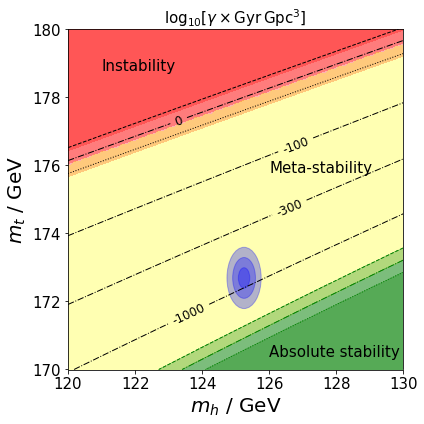

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat

# data info
DATE_LABEL = "2306"
USE_ELVAS_OUTPUT = True
MTMC = 172.69
MTMC_ERR = 0.3
MTPOLE = 172.5
MTPOLE_ERR = 0.7
MH = 125.25
MH_ERR = 0.17
nPts = 100

# # data info
# DATE_LABEL = "1803"
# USE_ELVAS_OUTPUT = True
# MTMC = 173.1
# MTMC_ERR = 0.6
# MH = 125.09
# MH_ERR = 0.24
# nPts = 50

# plot settings
MT_MIN = 170
MT_MAX = 180
MH_MIN = 120
MH_MAX = 130

# figure settings
fig = plt.figure(figsize=[6,6])

# subfigure
ax = fig.add_subplot(1,1,1)

# treatment of -infinity: absolute stability
LARGE_NEGATIVE = -1e100
def replaceInf(ndarr):
  condition = np.isneginf(ndarr)
  ndarr[condition] = LARGE_NEGATIVE
  return ndarr

# data input and reshape
if USE_ELVAS_OUTPUT:
  data = np.loadtxt("../output/" + DATE_LABEL + "_ELVAS_output.dat", usecols=range(3), delimiter=' ', skiprows=1)
  mh = data[:,0]
  mt = data[:,1]
  log10gamma = replaceInf(data[:,2])
  X, Y, Z = mh.reshape(nPts+1,nPts+1), mt.reshape(nPts+1,nPts+1), log10gamma.reshape(nPts+1,nPts+1)
  data = np.loadtxt("../output/" + DATE_LABEL + "_alphap1s_ELVAS_output.dat", usecols=range(3), delimiter=' ', skiprows=1)
  log10gamma = replaceInf(data[:,2])
  Zp = log10gamma.reshape(nPts+1,nPts+1)
  data = np.loadtxt("../output/" + DATE_LABEL + "_alpham1s_ELVAS_output.dat", usecols=range(3), delimiter=' ', skiprows=1)
  log10gamma = replaceInf(data[:,2])
  Zm = log10gamma.reshape(nPts+1,nPts+1)
  data = np.loadtxt("../output/" + DATE_LABEL + "_lammin.dat", usecols=range(3), delimiter='   ')
  lammin = data[:,2].reshape(nPts+1, nPts+1)
  data = np.loadtxt("../output/" + DATE_LABEL + "_alphap1s_lammin.dat", usecols=range(3), delimiter='   ')
  lamminp = data[:,2].reshape(nPts+1, nPts+1)
  data = np.loadtxt("../output/" + DATE_LABEL + "_alpham1s_lammin.dat", usecols=range(3), delimiter='   ')
  lamminm = data[:,2].reshape(nPts+1, nPts+1)
else:
  data = np.loadtxt("../output/" + DATE_LABEL + ".dat", usecols=range(5), delimiter='\t')
  mt = data[:,0]
  mh = data[:,1]
  log10gamma = data[:,2]
  log10gamma_plus = data[:,3]
  log10gamma_minus = data[:,4]
  X, Y, Z = mh.reshape(nPts+1,nPts+1), mt.reshape(nPts+1,nPts+1), log10gamma.reshape(nPts+1,nPts+1)
  Zp, Zm = log10gamma_plus.reshape(nPts+1,nPts+1), log10gamma_minus.reshape(nPts+1,nPts+1)

# for contour fill
# Z < -3 & lammin < 0 are required
metastability = np.maximum(Z + 3, lammin)

# contour plot (line / area)
cs = ax.contour(X, Y, Z, levels=[-1000, -300, -100, 0], colors='black', linewidths=1, linestyles='-.')
ax.contour(X, Y, Zp, levels=[0], colors='black', linewidths=1, linestyles='--')
ax.contour(X, Y, Zm, levels=[0], colors='black', linewidths=1, linestyles=':')
ax.contour(X, Y, lammin, levels=[0], colors='green', linewidths=1, linestyles='-.')
ax.contour(X, Y, lamminp, levels=[0], colors='green', linewidths=1, linestyles='--')
ax.contour(X, Y, lamminm, levels=[0], colors='green', linewidths=1, linestyles=':')
ax.contourf(X, Y, Z, levels=[-3, np.inf], alpha=0.3, colors='red')
ax.contourf(X, Y, Zp, levels=[-3, np.inf], alpha=0.3, colors='red')
ax.contourf(X, Y, Zm, levels=[-3, np.inf], alpha=0.3, colors='red')
ax.contourf(X, Y, metastability, levels=[0.5*LARGE_NEGATIVE, 0], alpha=0.3, colors='yellow')
ax.contourf(X, Y, lammin, levels=[0, -LARGE_NEGATIVE], alpha=0.3, colors='green')
ax.contourf(X, Y, lamminp, levels=[0, -LARGE_NEGATIVE], alpha=0.3, colors='green')
ax.contourf(X, Y, lamminm, levels=[0, -LARGE_NEGATIVE], alpha=0.3, colors='green')

# contour small label
ax.clabel(cs, fmt='%d', fontsize=12)

# physical parameters
for sigma in range(1, 4):
  e = pat.Ellipse(xy=(MH, MTMC), width=2*sigma*MH_ERR, height=2*sigma*MTMC_ERR, alpha=0.3, color="blue")
  ax.add_patch(e)

# annotation
ax.text(x=121, y=178.8, s="Instability", fontsize=15)
ax.text(x=126, y=175.8, s="Meta-stability", fontsize=15)
ax.text(x=126, y=170.4, s="Absolute stability", fontsize=15)

# plot range
ax.set_xlim(MH_MIN, MH_MAX)
ax.set_ylim(MT_MIN, MT_MAX)

# ticks setting
ax.set_title(r"$\log_{10} [\gamma \times {\rm Gyr}\,{\rm Gpc}^3]$", fontsize=15)
ax.tick_params(labelsize=15)

# figure captions
ax.set_xlabel(r"$m_h$ / GeV", size=20)
ax.set_ylabel(r"$m_t$ / GeV", size=20)

plt.tight_layout()
plt.savefig('phase_diagram_'+DATE_LABEL+'.pdf', bbox_inches='tight')

# add pole mass measurement result
# if DATE_LABEL == '2306':
#   for sigma in range(1, 4):
#     e = pat.Ellipse(xy=(MH, MTPOLE), width=2*sigma*MH_ERR, height=2*sigma*MTPOLE_ERR, alpha=0.3, color="orange")
#     ax.add_patch(e)
#   plt.savefig('phase_diagram_'+DATE_LABEL+'_mtpole.pdf', bbox_inches='tight')
